# PostgreSQL Tutorial

Here we will walk thru the Postgres Tutorial and practice my SQL queries.

**dBase:** Sample DVD database from [Postgres Tutorial](https://www.postgresqltutorial.com/postgresql-getting-started/load-postgresql-sample-database/). The TARball file is stored in `/sample_data` and must be used to create a `dvdrental` Postgres database.

In [1]:
import os
import psycopg2
import pandas as pd

In [2]:
%load_ext sql
# this magic command loads SQL for notebook cells

Connecting to 'default'

# Connect to the database

In a notebook there are two main options.
1. Get a `psycopg2.extensions.connection` object instantated, and pass it into a client library like `pandas` via [`pd.read_sql_query`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql_query.html) or `polars` via [`polars.read_database`](https://pola-rs.github.io/polars/py-polars/html/reference/api/polars.read_database.html).
2. Use [`%sqlcmd connect`](https://jupysql.ploomber.io/en/latest/api/magic-connect.html) cell magic to establish a connection, and then just use `%sql`.

In [3]:
%sqlcmd connect

ConnectorWidget(connections='[{"username": "postgres", "password": "Loladog101@DC-l", "host": "localhost", "da…

In [4]:
# option 1
dbase_connection: psycopg2.extensions.connection = psycopg2.connect(
    host='localhost',
    port=5432,
    dbname='dvdrental',
    user='postgres',
   password=os.environ['PG_PASSWORD'],
)

# The DVD Dataset

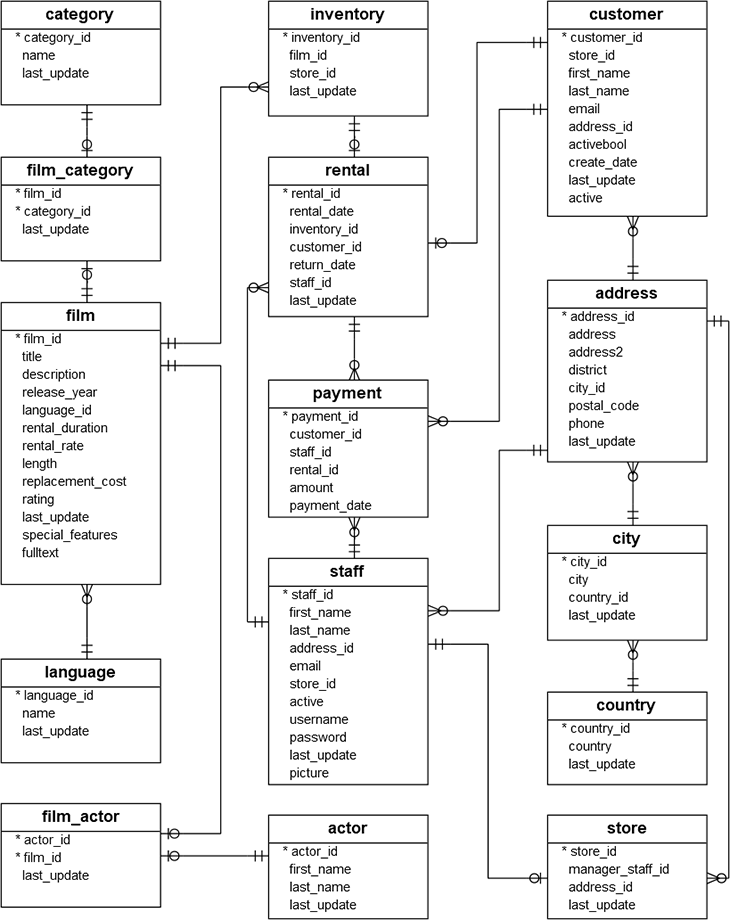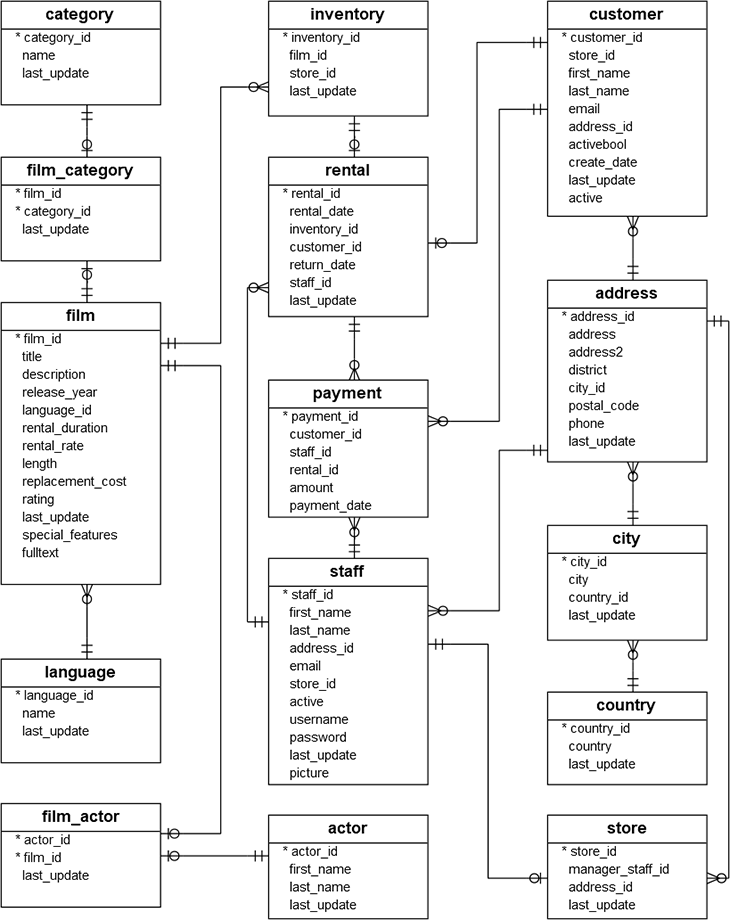

# Section 1: Querying Data

In [5]:
%%sql 
    SELECT *
    FROM category LIMIT 100;

Running query in 'default'

16 rows affected.

category_id,name,last_update
1,Action,2006-02-15 09:46:27
2,Animation,2006-02-15 09:46:27
3,Children,2006-02-15 09:46:27
4,Classics,2006-02-15 09:46:27
5,Comedy,2006-02-15 09:46:27
6,Documentary,2006-02-15 09:46:27
7,Drama,2006-02-15 09:46:27
8,Family,2006-02-15 09:46:27
9,Foreign,2006-02-15 09:46:27
10,Games,2006-02-15 09:46:27


In [8]:
%%sql 
    SELECT category_id, name AS category_name, last_update
    FROM category 
    ORDER BY category_name ASC
    LIMIT 100;

Running query in 'default'

16 rows affected.

category_id,category_name,last_update
1,Action,2006-02-15 09:46:27
2,Animation,2006-02-15 09:46:27
3,Children,2006-02-15 09:46:27
4,Classics,2006-02-15 09:46:27
5,Comedy,2006-02-15 09:46:27
6,Documentary,2006-02-15 09:46:27
7,Drama,2006-02-15 09:46:27
8,Family,2006-02-15 09:46:27
9,Foreign,2006-02-15 09:46:27
10,Games,2006-02-15 09:46:27


Here we can first order by one thing, and then order an duplicate first names by last name.

In [14]:
%%sql
SELECT 
    first_name, last_name
FROM
    customer
ORDER BY 
    first_name DESC,
    last_name DESC;

Running query in 'default'

599 rows affected.

first_name,last_name
Zachary,Hite
Yvonne,Watkins
Yolanda,Weaver
Wilma,Richards
Willie,Markham
Willie,Howell
William,Satterfield
Willard,Lumpkin
Wesley,Bull
Wendy,Harrison


Next we can order based on a calculate column like `SUM()`, and pair this witha groupby to find the top cusomters from the payments table.

In [18]:
%%sql
SELECT
    customer_id,
    SUM(amount) AS total_amount
FROM
    payment
GROUP BY
    customer_id
ORDER BY
    total_amount DESC;

Running query in 'default'

599 rows affected.

customer_id,total_amount
148,211.55
526,208.58
178,194.61
137,191.62
144,189.60
459,183.63
181,167.67
410,167.62
236,166.61
403,162.67


Or use LENGTH()

In [20]:
%%sql
SELECT 
    first_name,
    last_name,
    LENGTH(last_name) as last_name_len
FROM
    customer
ORDER BY 
    last_name_len DESC;

Running query in 'default'

599 rows affected.

first_name,last_name,last_name_len
Mitchell,Westmoreland,12
Nelson,Christenson,11
William,Satterfield,11
Allen,Butterfield,11
Roger,Quintanilla,11
Jonathan,Scarborough,11
Henry,Billingsley,11
Ashley,Richardson,10
Ruby,Washington,10
Leroy,Bustamante,10


# Section 2: Filtering Data